In [49]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import csv
from csv import writer
from csv import reader
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
with open('merged_data(1).csv', 'r') as read_obj: 
    with open('new_merged_data.csv', 'w', newline='') as write_obj:
        csv_reader = reader(read_obj)
        csv_writer = writer(write_obj)
        next(csv_reader)
        for row in csv_reader:
            if float(row[1]) > 1200000:
                row.append('very high')
            if float(row[1]) > 800000 and float(row[1]) <1200000:
                row.append('high')
            if float(row[1]) > 500000 and float(row[1]) <800000:
                row.append('medium')
            if float(row[1]) > 316178.0 and float(row[1]) <500000:
                row.append('low')
            csv_writer.writerow(row)

In [50]:
new_df = pd.read_csv('new_merged_data.csv')
new_df.head()

,Neighborhood,prices,year,month,total crime,violent crime,drug crime,housing crime,price classified
0,Allston,419685.0,2015,6,121,18,5,13,low
1,Allston,425878.0,2015,7,203,29,3,26,low
2,Allston,431874.0,2015,8,284,38,9,45,low
3,Allston,438437.0,2015,9,244,28,3,35,low
4,Allston,442258.0,2015,10,240,35,4,28,low


In [51]:
average_price = new_df.loc[new_df['price classified'] == 'very high']
average_price.head()

,Neighborhood,prices,year,month,total crime,violent crime,drug crime,housing crime,price classified
95,Back Bay,1201619.0,2017,9,326,40,3,25,very high
96,Back Bay,1203238.0,2017,10,364,29,5,45,very high
97,Back Bay,1205302.0,2017,11,286,27,2,19,very high
98,Back Bay,1207919.0,2017,12,332,40,7,35,very high
99,Back Bay,1211685.0,2018,1,274,34,9,41,very high


In [52]:
new_df.isnull().sum()
new_df['Neighborhood'].fillna(new_df['Neighborhood'].mode()[0], inplace = True)
new_df['prices'].fillna(new_df['prices'].mode()[0], inplace = True)
new_df['year'].fillna(new_df['year'].mode()[0], inplace = True)
new_df['month'].fillna(new_df['month'].mode()[0], inplace = True)
new_df['total crime'].fillna(new_df['total crime'].mode()[0], inplace = True)
new_df['violent crime'].fillna(new_df['violent crime'].mode()[0], inplace = True)
new_df['housing crime'].fillna(new_df['housing crime'].mode()[0], inplace = True)
new_df['drug crime'].fillna(new_df['drug crime'].mode()[0], inplace = True)
new_df['price classified'].fillna(new_df['price classified'].mode()[0], inplace = True)
new_df.isnull().sum

<bound method DataFrame.sum of       Neighborhood  prices   year  month  total crime  violent crime  \
0            False   False  False  False        False          False   
1            False   False  False  False        False          False   
2            False   False  False  False        False          False   
3            False   False  False  False        False          False   
4            False   False  False  False        False          False   
...            ...     ...    ...    ...          ...            ...   
1626         False   False  False  False        False          False   
1627         False   False  False  False        False          False   
1628         False   False  False  False        False          False   
1629         False   False  False  False        False          False   
1630         False   False  False  False        False          False   

      drug crime  housing crime  price classified  
0          False          False             False  


In [48]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
new_df['price classified'] = lb_make.fit_transform(new_df['price classified'])

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [54]:
label = new_df['price classified']
features = new_df[['violent crime', 'housing crime', 'drug crime', 'total crime']]

In [55]:
model = ExtraTreesClassifier()
model.fit(features,label)

ExtraTreesClassifier()

[0.28501515 0.21529684 0.15647234 0.34321567]


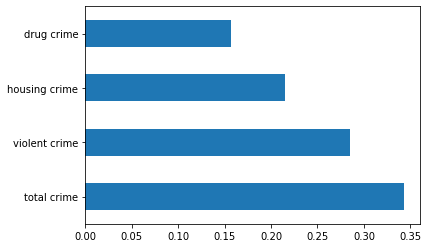

In [56]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

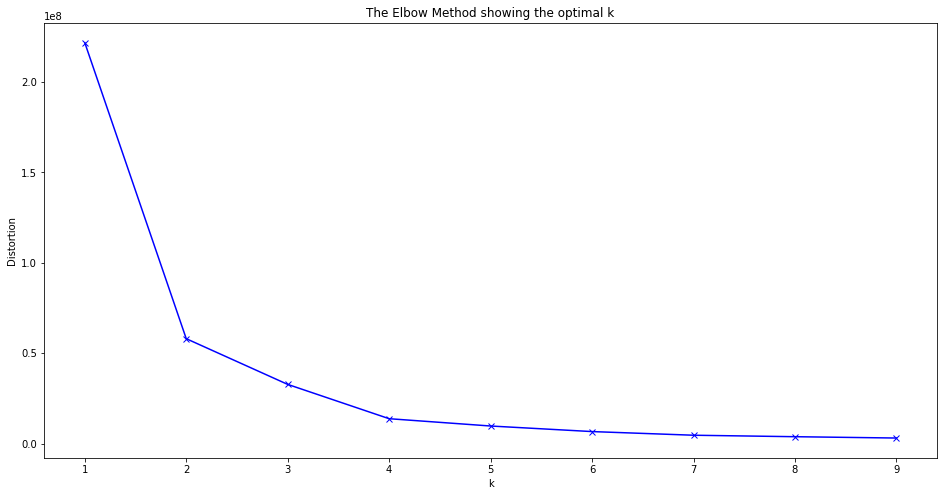

In [57]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

In [59]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, label, test_size=0.2)

In [60]:
knn = KNeighborsClassifier(n_neighbors=4)
model = knn.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test2)
accuracy = model.score(X_test, y_test)
print(accuracy)

0.7125382262996942


In [61]:
confusion_matrix(y_test, y_pred)

array([[33, 16, 36,  0],
       [22, 19, 31,  0],
       [42, 49, 71,  1],
       [ 6,  1,  0,  0]])

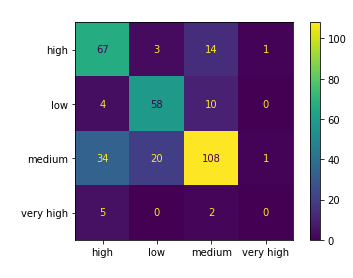

In [62]:
matrix = plot_confusion_matrix(model, X_test, y_test)
matrix.ax_.set_title('Confusion Matrix', color = 'white')
plt.xlabel('Predicted Label', color = 'white')
plt.ylabel('True Label', color = 'white')
plt.gcf().axes[0].tick_params(colors = 'black')
plt.gcf().axes[1].tick_params(colors = 'black')

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.32      0.39      0.35        85
         low       0.22      0.26      0.24        72
      medium       0.51      0.44      0.47       163
   very high       0.00      0.00      0.00         7

    accuracy                           0.38       327
   macro avg       0.26      0.27      0.27       327
weighted avg       0.39      0.38      0.38       327



In [64]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.6605504587155964


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.58      0.78      0.67        85
         low       0.70      0.62      0.66        72
      medium       0.70      0.64      0.67       163
   very high       0.00      0.00      0.00         7

    accuracy                           0.66       327
   macro avg       0.50      0.51      0.50       327
weighted avg       0.66      0.66      0.65       327



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Random Forest

In [66]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
Y_pred_rf = forest_model.predict(X_test)
accuracy = forest_model.score(X_test, y_test)
print(accuracy)

0.7217125382262997


In [67]:
confusion_matrix(y_test, Y_pred_rf)

array([[ 68,   3,  13,   1],
       [  2,  45,  24,   1],
       [ 24,  13, 123,   3],
       [  4,   0,   3,   0]])

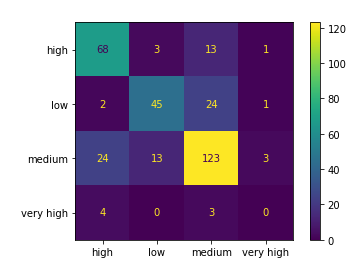

In [68]:
matrix = plot_confusion_matrix(forest_model, X_test, y_test)
matrix.ax_.set_title('Confusion Matrix', color = 'white')
plt.xlabel('Predicted Label', color = 'white')
plt.ylabel('True Label', color = 'white')
plt.gcf().axes[0].tick_params(colors = 'black')
plt.gcf().axes[1].tick_params(colors = 'black')

In [69]:
print(classification_report(y_test, Y_pred_rf))

              precision    recall  f1-score   support

        high       0.69      0.80      0.74        85
         low       0.74      0.62      0.68        72
      medium       0.75      0.75      0.75       163
   very high       0.00      0.00      0.00         7

    accuracy                           0.72       327
   macro avg       0.55      0.54      0.54       327
weighted avg       0.72      0.72      0.72       327



Neural network

In [23]:
from keras.models import Sequential 
from keras.layers import Dense
import tensorflow as tf
tf.convert_to_tensor(y_train, np.float)
tf.convert_to_tensor(X_train, np.float)
X_train=np.asarray(X_train).astype(np.float32)
X_test=np.asarray(X_test).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

In [24]:
from keras.models import Sequential 
from keras.layers import Dense
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=300, batch_size =30)

Epoch 1/300
44/44 [==============================] - 12s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1990
Epoch 2/300
44/44 [==============================] - 0s 831us/step - loss: 0.0000e+00 - accuracy: 0.2053
Epoch 3/300
44/44 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2044
Epoch 4/300
44/44 [==============================] - 0s 691us/step - loss: 0.0000e+00 - accuracy: 0.2072
Epoch 5/300
44/44 [==============================] - 0s 824us/step - loss: 0.0000e+00 - accuracy: 0.2025
Epoch 6/300
44/44 [==============================] - 0s 788us/step - loss: 0.0000e+00 - accuracy: 0.2126
Epoch 7/300
44/44 [==============================] - 0s 747us/step - loss: 0.0000e+00 - accuracy: 0.1832
Epoch 8/300
44/44 [==============================] - 0s 781us/step - loss: 0.0000e+00 - accuracy: 0.1975
Epoch 9/300
44/44 [==============================] - 0s 745us/step - loss: 0.0000e+00 - accuracy: 0.1966
Epoch 10/300
44/44 [==============================] - 0s 7

In [27]:
Y_pred_nn = model.predict(X_test)

In [28]:
print(classification_report(y_test, Y_pred_nn))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        98
         1.0       0.23      1.00      0.38        76
         2.0       0.00      0.00      0.00       137
         3.0       0.00      0.00      0.00        16

    accuracy                           0.23       327
   macro avg       0.06      0.25      0.09       327
weighted avg       0.05      0.23      0.09       327



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [70]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.56


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.26      0.07      0.11        85
         low       0.96      0.31      0.46        72
      medium       0.55      0.94      0.69       163
   very high       0.00      0.00      0.00         7

    accuracy                           0.56       327
   macro avg       0.44      0.33      0.32       327
weighted avg       0.55      0.56      0.48       327



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

<function matplotlib.pyplot.show(close=None, block=None)>

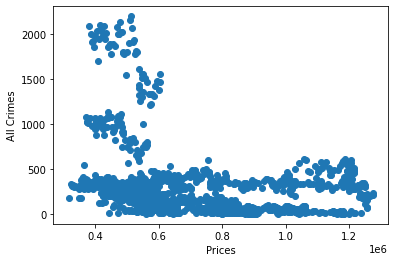

In [17]:
#Nuh add in this one!!!!!!
#This just maps all the crime to the prices
plt.scatter(new_df['prices'], new_df['total crime'])
plt.xlabel('Prices')
plt.ylabel('All Crimes')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

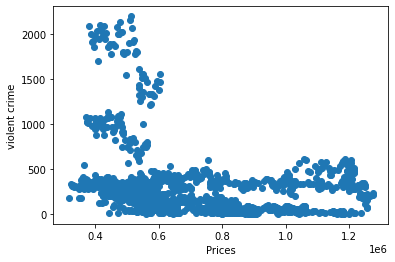

In [18]:
plt.scatter(new_df['prices'], new_df['total crime'])
plt.xlabel('Prices')
plt.ylabel('violent crime')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

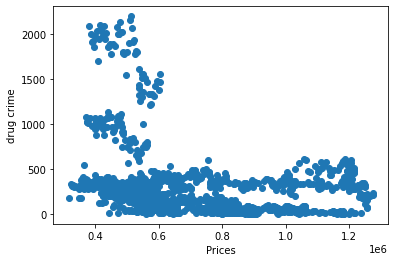

In [19]:
plt.scatter(new_df['prices'], new_df['total crime'])
plt.xlabel('Prices')
plt.ylabel('drug crime')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

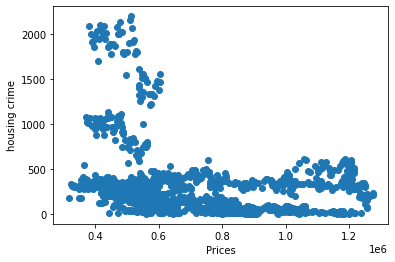

In [20]:
plt.scatter(new_df['prices'], new_df['total crime'])
plt.xlabel('Prices')
plt.ylabel('housing crime')
plt.show

In [35]:
new_df.head()

,Neighborhood,prices,year,month,total crime,violent crime,drug crime,housing crime,price classified
0,Allston,419685.0,2015,6,121,18,5,13,low
1,Allston,425878.0,2015,7,203,29,3,26,low
2,Allston,431874.0,2015,8,284,38,9,45,low
3,Allston,438437.0,2015,9,244,28,3,35,low
4,Allston,442258.0,2015,10,240,35,4,28,low


In [155]:
new_df = pd.read_csv('new_merged_data.csv')

In [156]:
average_price = new_df.loc[new_df['price classified'] == 'medium']

In [157]:
x = new_df[['prices', 'total crime']]

In [158]:
x['prices'].max()

1274896.0

In [159]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [160]:
clusters=x.copy()
clusters['clusters_pred']=kmeans.fit_predict(x)

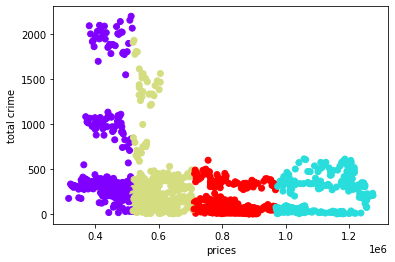

In [161]:
plt.scatter(clusters['prices'], clusters['total crime'], c=clusters['clusters_pred'], cmap='rainbow')
plt.xlabel('prices')
plt.ylabel('total crime')
plt.show()